In [1]:
# import packages
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py
import yaml
import math
from larndsim import consts, fee
from collections import defaultdict
import reco_fxns
from reco_constants import *
#from uncertainties import ufloat
import time
import cvxpy as cp

In [2]:
dict_path = 'multi_tile_layout-2.3.16.pkl'
pixel_xy = reco_fxns.load_geom_dict(dict_path)

In [3]:
Ar39 = 0
all_charge_85Kr = 0
all_charge_40K = 0
all_charge_60Co = 0
all_charge_232Th = 0
all_charge_238U = 0
all_charge_cosmics = 0


In [4]:
# data
f_packets = h5py.File('/sdf/group/neutrino/sfogarty/module0_files/charge_data/datalog_2021_04_04_00_41_40_CEST.h5')
#f_packets = h5py.File('/Users/samuelfogarty/Desktop/mod0files.nosync/medium_threshold/datalog_2021_04_06_13_26_23_CEST.h5')
packet_start,packet_end = 0,15000000
#data_1, txyz, txyz_noise,  one_packet_data, two_packet_data, three_packet_data, four_packet_data = reco_fxns.analysis(f_packets,pixel_xy,sel_start=packet_start,sel_end=packet_end)
#data, txyz_data, txyz_noise_data = reco_fxns.analysis(f_packets,pixel_xy,sel_start=packet_start,sel_end=packet_end,cut=False)
data = reco_fxns.analysis(f_packets,pixel_xy,sel_start=packet_start,sel_end=packet_end,cut=False)
#data_cut, txyz_data_cut, txyz_noise_data_cut = reco_fxns.analysis(f_packets,pixel_xy,sel_start=packet_start,sel_end=packet_end,cut=True)

block 1.1 =  4.602355003356934  s
block 1.2.1 =  0.07893228530883789
block 1.2.2 =  0.21727752685546875
block 1.2.3 =  0.1237492561340332
block 1.2.4 =  0.7235443592071533
block 1.2.5 =  1.7332229614257812
block 1.2 =  2.8798651695251465  s
block 1 =  7.596747398376465  s
zip pixel tyz 1 =  25.542704820632935
zip 2 =  6.266728162765503
block 2 =  32.0906023979187  s
block 3 =  7.331543922424316  s
block 4 =  9.5367431640625e-07  s
5.1.1 =  39.724119663238525
The total number of core samples =  697291
Total number of noise samples =  2307361
Total number of noncore samples =  391645
block 5.1 =  43.229610443115234
block 5.2 =  5.0067901611328125e-06
5.1.1 =  23.895503520965576
The total number of core samples =  2307361
Total number of noise samples =  0
Total number of noncore samples =  0
block 5.3 =  24.00492262840271
block 5 =  24.132436752319336  s
block 6 =  0.26542162895202637  s
block 7 =  0.22043466567993164  s


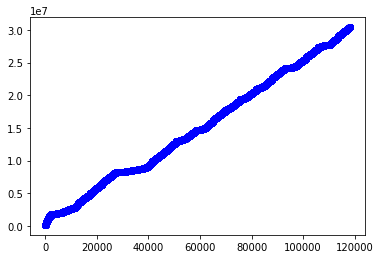

In [5]:
time = data[:,2]
plt.plot(time, 'bo')
plt.show()

In [8]:
data
#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
#ax.scatter(time_seconds, x, y)
#ax.set_xlabel('time [seconds]')
#ax.set_ylabel('x [mm]')
#ax.set_zlabel('y [mm]')

array([[ 1.00000000e+00,  1.75376008e+01,  1.99922495e+05,
         1.84011000e+02,  5.87505000e+02, -3.04310000e+02],
       [ 1.00000000e+00,  1.14052333e+01,  2.59738096e+05,
         2.10615000e+02,  5.47599000e+02, -3.04310000e+02],
       [ 1.00000000e+00,  1.61142467e+01,  4.25786392e+05,
         1.57407000e+02, -2.43870000e+01, -3.04310000e+02],
       ...,
       [ 1.00000000e+00,  6.85774783e+00,  1.59479403e+06,
         2.06181000e+02,  2.28351000e+02, -3.04310000e+02],
       [ 1.00000000e+00,  1.10781294e+01,  1.59619835e+06,
         2.68257000e+02,  9.97650000e+01, -3.04310000e+02],
       [ 1.00000000e+00,  2.00966508e+01,  1.59691962e+06,
        -2.68257000e+02, -2.99295000e+02, -3.04310000e+02]])

In [21]:
# 39Ar
file_main = '/Users/samuelfogarty/Desktop/mod0files.nosync/simulation/larnd-sim/radiologicals/argon39_NEST_5k-events_0.2-0.1-stepfxn_module0_larndsim_'

numFiles = 5
Ar39_all = np.array([])
#txyz_Ar39_all = []
for i in range(1, numFiles+1):
    f_39Ar = h5py.File(file_main+str(i)+'.h5')
    packet_start,packet_end = 0,-1
    Ar39, txyz, txyz_noise = reco_fxns.analysis(f_39Ar,pixel_xy,sel_start=packet_start,sel_end=packet_end)
    Ar39_all = np.concatenate((Ar39_all, Ar39))
    #txyz_Ar39_all+=txyz_noise

The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  1609
labels noise =  [   0    1    2 ... 1576 1577 1578]
dataword =  [85 81 85 ... 84 84 87]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  1586
labels noise =  [   0    1    2 ... 1561 1562 1563]
dataword =  [85 81 86 ... 84 85 86]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  1571
labels noise =  [   0    1    2 ... 1548 1549 1550]
dataword =  [85 81 87 ... 83 85 88]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  1570
labels noise =  [   0    1    2 ... 1542 1543 1544]
dataword =  [85 84 88 ... 85 81 87]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  1628
labels noise =  [   0    1    2 ... 1602 1603 1604]
dataword =  [85 81 83 ... 82 82

In [23]:
len(txyz_Ar39_all)

7964

In [7]:
# 85Kr
file_main = '/Users/samuelfogarty/Desktop/mod0files.nosync/simulation/larnd-sim/radiologicals/krypton85_NEST_5k-events_0.2-0.1-stepfxn_module0_larndsim_'

numFiles = 3
Kr85_all = np.array([])
for i in range(1, numFiles+1):
    f_85Kr = h5py.File(file_main+str(i)+'.h5')
    packet_start,packet_end = 0,-1
    Kr85, txyz, txyz_noise = reco_fxns.analysis(f_85Kr,pixel_xy,sel_start=packet_start,sel_end=packet_end)
    Kr85_all = np.concatenate((Kr85_all, Kr85))

The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  2084
labels noise =  [   0    1    2 ... 2027 2028 2029]
dataword =  [89 81 81 ... 81 84 86]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  2031
labels noise =  [   0    1    2 ... 1987 1988 1989]
dataword =  [89 83 83 ... 82 81 83]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  2061
labels noise =  [   0    1    2 ... 2004 2005 2006]
dataword =  [89 82 81 ... 81 83 85]


In [8]:
# 60Co
file_main = '/Users/samuelfogarty/Desktop/mod0files.nosync/simulation/larnd-sim/radiologicals/cobalt60_NEST_5k-events_0.2-0.1-stepfxn_module0_larndsim_'

numFiles = 3
Co60_all = np.array([])
for i in range(1, numFiles+1):
    f_60Co = h5py.File(file_main+str(i)+'.h5')
    packet_start,packet_end = 0,-1
    Co60, txyz, txyz_noise = reco_fxns.analysis(f_60Co,pixel_xy,sel_start=packet_start,sel_end=packet_end)
    Co60_all = np.concatenate((Co60_all, Co60))

The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  509
labels noise =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  75  76  77  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 

In [9]:
# K40
file_main = '/Users/samuelfogarty/Desktop/mod0files.nosync/simulation/larnd-sim/radiologicals/potassium40_NEST_5k-events_0.2-0.1-stepfxn_module0_larndsim_'

numFiles = 3
K40_all = np.array([])
for i in range(1, numFiles+1):
    f_40K = h5py.File(file_main+str(i)+'.h5')
    packet_start,packet_end = 0,-1
    K40, txyz, txyz_noise = reco_fxns.analysis(f_40K,pixel_xy,sel_start=packet_start,sel_end=packet_end)
    K40_all = np.concatenate((K40_all, K40))

The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  4284
labels noise =  [   0    1    2 ... 3810 3811 3811]
dataword =  [87 89 85 ... 76 85 80]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  4298
labels noise =  [   0    1    2 ... 3822 3823 3823]
dataword =  [86 89 85 ... 76 81 84]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  4294
labels noise =  [   0    1    2 ... 3814 3814 3815]
dataword =  [90 91 86 ... 77 75 84]


In [10]:
# Th232
file_main = '/Users/samuelfogarty/Desktop/mod0files.nosync/simulation/larnd-sim/radiologicals/thorium232_NEST_5k-events_0.2-0.1-stepfxn_module0_larndsim_'

numFiles = 5
Th232_all = np.array([])
for i in range(1, numFiles+1):
    f_232Th = h5py.File(file_main+str(i)+'.h5')
    packet_start,packet_end = 0,-1
    Th232, txyz, txyz_noise = reco_fxns.analysis(f_232Th,pixel_xy,sel_start=packet_start,sel_end=packet_end)
    Th232_all = np.concatenate((Th232_all, Th232))

The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  2492
labels noise =  [   0    1    2 ... 2002 2003 2003]
dataword =  [88 82 89 ... 84 93 83]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  2464
labels noise =  [   0    1    1 ... 1992 1993 1993]
dataword =  [88 78 90 ... 88 83 96]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  2502
labels noise =  [   0    1    1 ... 1992 1993 1993]
dataword =  [88 88 78 ... 87 99 84]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  2504
labels noise =  [   0    1    2 ... 2027 2027 2027]
dataword =  [88 88 83 ... 91 84 84]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  2546
labels noise =  [   0    1    2 ... 2041 2041 2041]
dataword =  [88 80 77 ... 92 85

In [11]:
# U238
file_main = '/Users/samuelfogarty/Desktop/mod0files.nosync/simulation/larnd-sim/radiologicals/uranium238_NEST_5k-events_0.2-0.1-stepfxn_module0_larndsim_'

numFiles = 5
U238_all = np.array([])
for i in range(1, numFiles+1):
    f_238U = h5py.File(file_main+str(i)+'.h5')
    packet_start,packet_end = 0,-1
    U238, txyz, txyz_noise = reco_fxns.analysis(f_238U,pixel_xy,sel_start=packet_start,sel_end=packet_end)
    U238_all = np.concatenate((U238_all, U238))

The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  3555
labels noise =  [   0    1    1 ... 2677 2678 2678]
dataword =  [95 88 91 ... 91 84 85]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  3537
labels noise =  [   0    1    1 ... 2683 2684 2685]
dataword =  [95 88 87 ... 84 92 91]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  3567
labels noise =  [   0    1    1 ... 2697 2698 2698]
dataword =  [94 88 93 ... 92 85 86]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  3583
labels noise =  [   0    1    1 ... 2707 2708 2708]
dataword =  [94 87 87 ... 90 82 82]
The total number of core samples =  0
Total number of noise samples =  0
Total number of noncore samples =  3585
labels noise =  [   0    1    1 ... 2711 2712 2713]
dataword =  [96 86 92 ... 84 88

/Users/samuelfogarty/opt/anaconda3/envs/mod0reco/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:477: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


Text(0, 0.5, 'y [mm]')

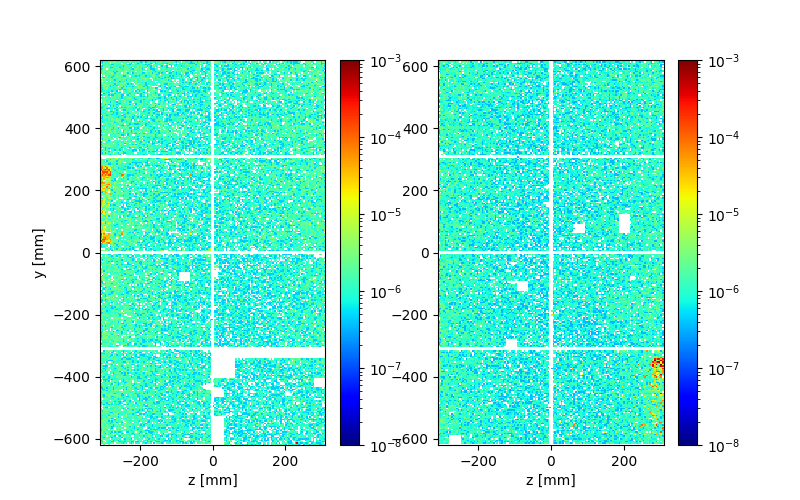

In [11]:
%matplotlib widget
nqtxyz = data
pos_z = np.array(nqtxyz)[:,5] > 0
time_seconds_io1 = np.array(nqtxyz)[:,2][pos_z]/1.6 * 1e-6
x_io1 = np.array(nqtxyz)[:,3][pos_z]
y_io1 = np.array(nqtxyz)[:,4][pos_z]

neg_z = np.array(nqtxyz)[:,5] < 0
time_seconds_io2 = np.array(nqtxyz)[:,2][neg_z]/1.6 * 1e-6
x_io2 = np.array(nqtxyz)[:,3][neg_z]
y_io2 = np.array(nqtxyz)[:,4][neg_z]

#print('Rate of clusters in data w/o cuts = ', len(data)/(np.max(time_seconds_io1) + np.max(time_seconds_io2)), ' Hz')
#print('Rate of clusters in data w/ cuts = ', len(data_cut)/(np.max(time_seconds_io1) + np.max(time_seconds_io2)), ' Hz')

z_io1 = y_io1
z_io2 = y_io2 
y_io1 = x_io1
y_io2 = x_io2

Range = [[-310, 310],[-620, 620]]
x_bins = 140
y_bins = 2*x_bins
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(8,5))
cmap = plt.cm.jet
H1 = axes[0].hist2d(y_io1, z_io1, bins = [x_bins,y_bins],range=Range,cmap=cmap,norm = colors.LogNorm(vmin=1e-8,vmax=1e-3),density=True)
fig.colorbar(H1[3], ax=axes[0])
H2 = axes[1].hist2d(y_io2, z_io2, bins = [x_bins,y_bins],range=Range,cmap=cmap,norm = colors.LogNorm(vmin=1e-8,vmax=1e-3),density=True)
fig.colorbar(H2[3], ax=axes[1])
#axes[0].set_title('io group 1')
#axes[1].set_title('io_group 2')
#fig.suptitle(r'$^{39} Ar$ $\beta-$ candidates spatial distribution (module-0 data)')
axes[0].set_xlabel('z [mm]')
axes[1].set_xlabel('z [mm]')
axes[0].set_ylabel('y [mm]')
#axes[1].set_ylabel('y [mm]')
#plt.savefig('argon39_candidates_anode_distribution_2021_04_05_01_19_39_2Mto6M_selection_without_cosmics_veto.pdf')
#plt.savefig('txyz_noise_data_2021_04_04_00_41_40_CEST_0Mto7M_sel_with_tile_cut.pdf')
#plt.savefig('argon39_reco_data_and_data_with_cuts_two_slices_of_not_noisy_tiles_2d_distributions.pdf')

In [69]:
#%matplotlib widget
#packet_sel = f_39Ar['packets'][f_39Ar['packets']['packet_type'] == 0]
#dataword_sel = packet_sel['dataword']
##gain = 1/221 # mV/e-
##v_cm = 288.28125
##v_ref = 1300.78125
##v_pedestal = 598
#gain = 0.004 # mV/e-
#v_cm = 288
#v_ref = 1300
#v_pedestal = 580
#charge = (dataword_sel.astype('float64')/float(256)*(v_ref - v_cm)+v_cm-v_pedestal)/gain * 1e-3
#%matplotlib widget
#plt.hist(charge,bins=50)
#plt.show()

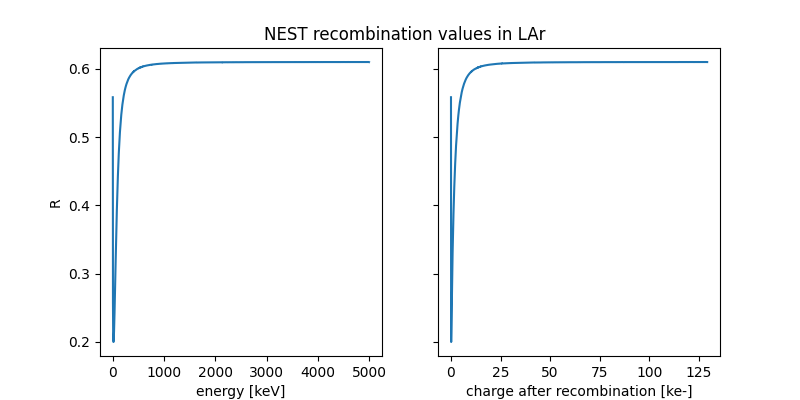

In [14]:
nest_filename = "NEST_electron-energy_and_recombination-factors_Efield500_1keV_to_5000keV.h5"
nest_file = h5py.File(nest_filename)
energies = np.array(nest_file['NEST']['E_start'])
recombination = np.array(nest_file['NEST']['R'])

%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=(8,4))
axes[0].plot(energies, recombination)
axes[0].set_xlabel('energy [keV]')
axes[0].set_ylabel('R')
#axes[0].set_xlim(0, 600)

charge_ke = energies / 23.6 * recombination 
axes[1].plot(charge_ke, recombination)
axes[1].set_xlabel('charge after recombination [ke-]')
#axes[1].set_xticks(np.arange(0, np.max(energies/23.6 * recombination), 2))
#axes[1].set_xlim(0, 600/23.6 * np.interp(600, energies, recombination))
axes[0].set_title('NEST recombination values in LAr', x=1.08)
#plt.savefig('NEST_recombination_values_energy-basis_and_charge-after-recombination-basis.pdf')

/Users/samuelfogarty/opt/anaconda3/envs/mod0reco/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:477: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


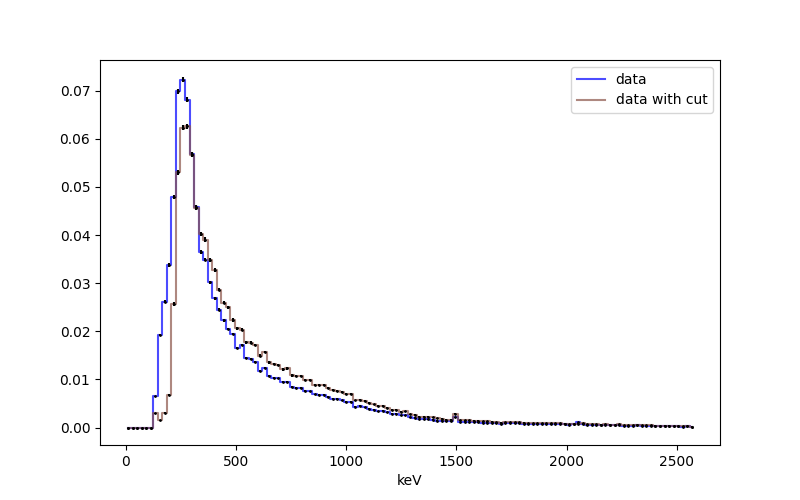

In [14]:
# make spectrum plots
bins = 125
recomb_filename = "NEST_electron-energy_and_recombination-factors_Efield500_1keV_to_5000keV.h5"
%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(8,5))

bincenters, y_norm_data, y_norm_std_data = reco_fxns.plot_hist(data[:,1],axes,bins,data_type='data',color='b',label='data',norm='area',calibrate=True,recomb_filename=recomb_filename)

cut_io1 = (data[:,4] > 0) & (data[:,4] < 310) & (data[:,3] < -250) & (data[:,3] > -310) & (data[:,5] > 0)
cut_io2 = (data[:,4] < -310) & (data[:,4] > -620) & (data[:,3] > 250) & (data[:,3] < 310) & (data[:,5] < 0)
cut_total = np.invert(cut_io1 + cut_io2)
q_cut = data[:,1][cut_total]
bincenters, y_norm_data, y_norm_std_data = reco_fxns.plot_hist(q_cut,axes,bins,data_type='data',color='tab:brown',label='data with cut',norm='area',calibrate=True,recomb_filename=recomb_filename)
#bincenters, y_norm_data_cut, y_norm_std_data_cut = reco_fxns.plot_hist(data_cut,axes,bins,data_type='data',color='tab:brown',label='data with cuts',norm='area',calibrate=True,recomb_filename=recomb_filename)
#bincenters, y_norm_Ar39, y_norm_std_Ar39 = reco_fxns.plot_hist(Ar39_all,axes,bins,data_type='MC',color='r',label=r'39Ar $\beta$-  MC', norm='area',calibrate=True,recomb_filename=recomb_filename)
#bincenters, y_norm_Kr85, y_norm_std_Kr85 = reco_fxns.plot_hist(Kr85_all,axes,bins,data_type='MC',color='g',label=r'85Kr $\beta$-  MC', norm='area',calibrate=True,recomb_filename=recomb_filename)
#bincenters, y_norm_Co60, y_norm_std_Co60 = reco_fxns.plot_hist(Co60_all,axes,bins,data_type='MC',color='y',label=r'60Co $\beta$-  MC', norm='area',calibrate=True,recomb_filename=recomb_filename)
#bincenters, y_norm_K40, y_norm_std_K40 = reco_fxns.plot_hist(K40_all,axes,bins,data_type='MC',color='m',label=r'40K $\beta$-  MC', norm='area',calibrate=True,recomb_filename=recomb_filename)
#bincenters, y_norm_Th232, y_norm_std_Th232 = reco_fxns.plot_hist(Th232_all,axes,bins,data_type='MC',color='c',label=r'232Th $\beta$-  MC', norm='area',calibrate=True,recomb_filename=recomb_filename)
#bincenters, y_norm_U238, y_norm_std_U238 = reco_fxns.plot_hist(U238_all,axes,bins,data_type='MC',color='k',label=r'238U $\beta$-  MC', norm='area',calibrate=True,recomb_filename=recomb_filename)

#reco_fxns.plot_hist(all_charge_cosmics,axes,bins,data_type='MC',color='g--',label=r'CORSIKA cosmics MC')
#axes.set_xlim(0,5)
axes.legend()
plt.show()

#axes.set_xlim(0,40)
#axes.set_xticks(np.arange(0,2200,200))
#axes.set_title('module-0 39Ar candidates')
#axes.set_yscale('log')
#axes.set_xlim(200, 1250)
#axes.set_xscale('linear')
#axes.legend(loc='upper right')
#plt.savefig('argon39_reco_data_and_data_with_cuts_two_slices_of_not_noisy_tiles.pdf')


In [13]:
# multi component fit
fit_data = y_norm_data_cut
n = 6
A = np.zeros((len(fit_data), n))
A[:,0] = y_norm_Ar39
A[:,1] = y_norm_Kr85
A[:,2] = y_norm_Co60
A[:,3] = y_norm_K40
A[:,4] = y_norm_Th232
A[:,5] = y_norm_U238
b = fit_data
# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
#constraints = [0 <= x, x >= 0]
constraints = [x >= 0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
values = x.value
print(values)
#fit = f1_vals * values[0] + f2_vals * values[1] + f3_vals * values[2] + f4_vals * values[3]


[ 2.02867887e-01 -1.03065676e-17  1.27626128e-01  2.19210221e-02
  3.25895512e-02  6.07718514e-01]


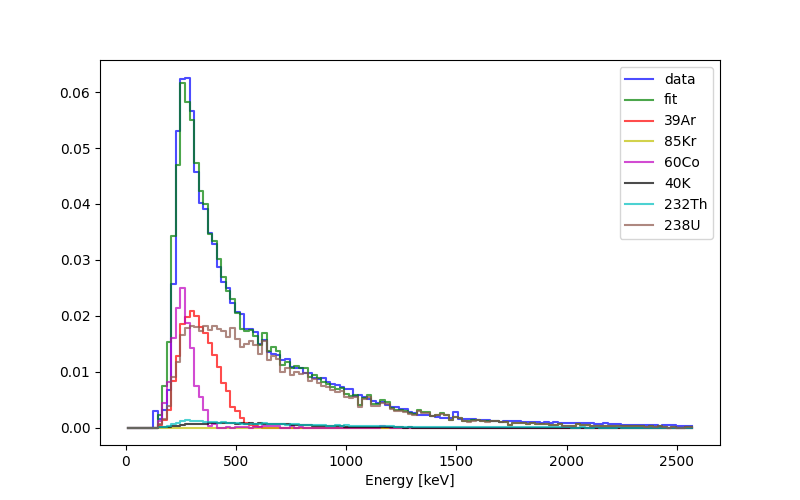

In [15]:
%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(8,5))
linewidth=1.5
y_norm_fit = y_norm_Ar39 * values[0] + y_norm_Kr85 * values[1] + y_norm_Co60 * values[2] + y_norm_K40 * values[3] + y_norm_Th232 * values[4]  + y_norm_U238 * values[5]
#y_norm_fit = y_norm_Ar39 * values[0] + y_norm_Co60 * values[1] + y_norm_K40 * values[2] + y_norm_Th232 * values[3]  + y_norm_U238 * values[4]

axes.step(bincenters, fit_data, linewidth=linewidth, color='b',where='mid',alpha=0.7, label='data')
#axes.step(bincenters, y_norm_data_cut, linewidth=linewidth, color='b',where='mid',alpha=0.7, label='data with cuts')
#axes.errorbar(bincenters, y_norm_data, yerr=y_norm_std_data,color='k',fmt='o',markersize = 1)

axes.step(bincenters, y_norm_fit, linewidth=linewidth, color='g',where='mid',alpha=0.7, label='fit')
#axes.errorbar(bincenters, y_norm_fit, yerr=y_norm_std_data,color='k',fmt='o',markersize = 1)

axes.step(bincenters, y_norm_Ar39*values[0], linewidth=linewidth, color='r',where='mid',alpha=0.7, label='39Ar')
axes.step(bincenters, y_norm_Kr85*values[1], linewidth=linewidth, color='y',where='mid',alpha=0.7, label='85Kr')
axes.step(bincenters, y_norm_Co60*values[2], linewidth=linewidth, color='m',where='mid',alpha=0.7, label='60Co')
axes.step(bincenters, y_norm_K40*values[3], linewidth=linewidth, color='k',where='mid',alpha=0.7, label='40K')
axes.step(bincenters, y_norm_Th232*values[4], linewidth=linewidth, color='c',where='mid',alpha=0.7, label='232Th')
axes.step(bincenters, y_norm_U238*values[5], linewidth=linewidth, color='tab:brown',where='mid',alpha=0.7, label='238U')
#axes.set_xlim(0,50)
#axes.set_yscale('log')
axes.set_xlabel('Energy [keV]')
axes.legend()
#plt.savefig('argon39_reco_multi-component-fit_with_tile_cuts.pdf')

In [13]:
import random
nums = np.random.choice([-1, 1], size=10, p=[.5, .5])
nums

array([ 1, -1,  1,  1,  1, -1,  1, -1,  1, -1])

In [14]:
from scipy.stats import uniform
import scipy.stats
scipy.stats.uniform.rvs(loc=0, scale=1, size=2)

array([0.77958941, 0.42727401])

In [12]:
x = [0.011300, 0.000000,
    0.022600, 0.009682,
    0.033900, 0.015360,
    0.045200, 0.018879,
    0.056500, 0.023414,
    0.067800, 0.023382,
    0.079100, 0.024780,
    0.090400, 0.028265,
    0.101700, 0.026785,
    0.113000, 0.027433,
    0.124300,0.027934,
    0.135600, 0.030906,
    0.146900, 0.028622,
    0.158200,0.028816,
    0.169500, 0.031575,
    0.180800, 0.029006,
    0.192100, 0.029009,
    0.203400, 0.031589,
    0.214700, 0.028852,
    0.226000, 0.028701,
    0.237300, 0.028502,
    0.248600, 0.030805,
    0.259900, 0.027918,
    0.271200, 0.027554,
    0.282500, 0.029576,
    0.293800, 0.026601,
    0.305100, 0.026047,
    0.316400, 0.027702,
    0.327700, 0.024665,
    0.339000, 0.023893,
    0.350300,0.023048,
    0.361600, 0.024093,
    0.372900, 0.021042,
    0.384200, 0.019971,
    0.395500, 0.020485,
    0.406800, 0.017514,
    0.418100, 0.016246,
    0.429400, 0.016217,
    0.440700, 0.013441,
    0.452000, 0.012048,
    0.463300, 0.010639,
    0.474600, 0.009997,
    0.485900, 0.007708,
    0.497200, 0.006353,
    0.508500, 0.005457,
    0.519800, 0.003742,
    0.531100, 0.002654,
    0.542400, 0.001822,
    0.553700, 0.000877,
    0.565000, 0.000338]

/Users/samuelfogarty/opt/anaconda3/envs/mod0reco/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:477: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


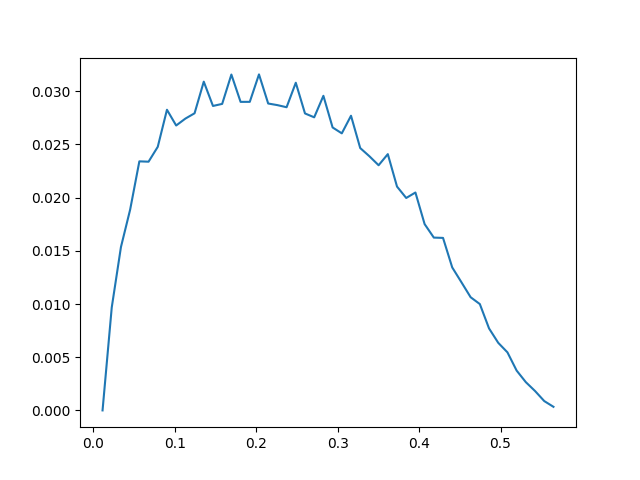

In [15]:
%matplotlib widget
plt.plot(x[0::2], x[1::2])

In [4]:

f_edep = h5py.File('/Users/samuelfogarty/Desktop/mod0files.nosync/simulation/edep-sim/argon39.h5')



In [5]:
f_edep.keys()

<KeysViewHDF5 ['segments', 'trajectories', 'vertices']>

In [6]:
f_edep['segments'].dtype.names

('eventID',
 'segment_id',
 'z_end',
 'trackID',
 'tran_diff',
 'z_start',
 'x_end',
 'E_start',
 'y_end',
 'n_electrons',
 'pdgId',
 'x_start',
 'y_start',
 't_start',
 't0_start',
 't0_end',
 't0',
 'dx',
 'long_diff',
 'pixel_plane',
 't_end',
 'dEdx',
 'dE',
 't',
 'y',
 'x',
 'z',
 'n_photons')

In [7]:
numEvents = np.max(f_edep['segments']['eventID'])+1
event_charge = []
for i in range(numEvents):
    segs = f_edep['segments'][f_edep['segments']['eventID'] == i]
    event_charge.append(np.sum(segs['dE'])*1000)

(array([60., 88., 31., 44., 82., 58., 26., 31., 56., 47., 31., 22., 21.,
        29., 42., 27., 22., 23., 13., 15., 25., 24., 23., 15.,  6., 12.,
        11., 12., 12., 14.,  7.,  2.,  6.,  8.,  3.,  5.,  5.,  6.,  6.,
         3.,  4.,  3.,  1.,  4.,  3.,  2.,  0.,  2.,  1.,  1.,  0.,  1.,
         1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0.        ,   99.14937973,  198.29875946,  297.44813919,
         396.59751892,  495.74689865,  594.89627838,  694.04565811,
         793.19503784,  892.34441757,  991.4937973 , 1090.64317703,
        1189.79255676, 1288.94193649, 1388.09131622, 1487.24069595,
        1586.39007568, 1685.53945541, 1784.68883514, 1883.83821487,
        1982.9875946 , 2082.13697433, 2181.28635406, 2280.4357338 ,
        2379.58511353, 247

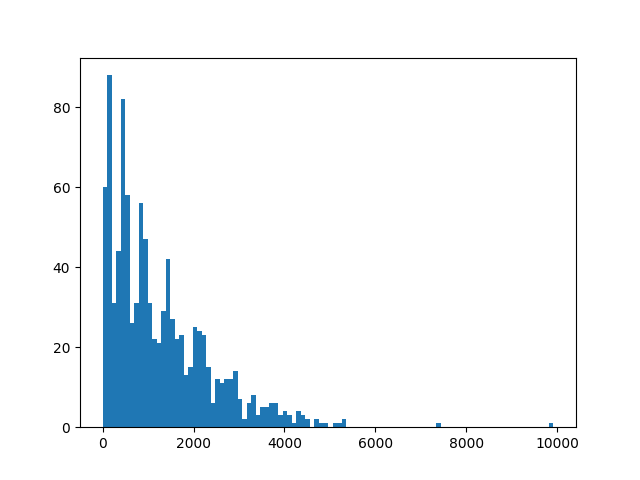

In [9]:
%matplotlib widget
plt.hist(event_charge, bins = 100)